In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("framingham.csv")

# Mostrar las primeras filas
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Verificamos valores nulos
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
# Eliminamos filas con valores faltantes
df_clean = df.dropna()

# Separar variables independientes (X) y variable dependiente (y)
X = df_clean.drop('TenYearCHD', axis=1)
y = df_clean['TenYearCHD']


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Precisión del modelo: 0.84


C:\Users\IPF-2025\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


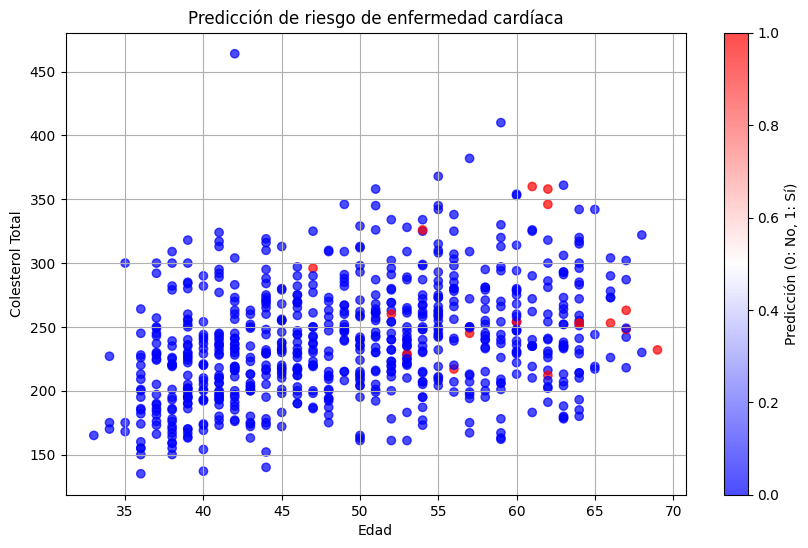

In [9]:
import matplotlib.pyplot as plt

# Crear scatter plot con las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(X_test['age'], X_test['totChol'], c=y_pred, cmap='bwr', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Colesterol Total')
plt.title('Predicción de riesgo de enfermedad cardíaca')
plt.colorbar(label='Predicción (0: No, 1: Sí)')
plt.grid(True)
plt.show()
